##Principal component analysis PCA

In [ ]:
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### Load the data

In [ ]:
# Load data
data = pd.read_csv('/content/gdrive/MyDrive/AIA-IAAC/AIA-Artium-LEEDScore/Iteration5_2488samples_ASE+SDA/atrium_SDA+ASE_v1_2488_samples.csv', delimiter= " ")
pd.set_option('display.max_columns', None)
data.dropna(inplace=True)

### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   typicalGlazingRatio  2488 non-null   float64
 1   typicalWindowWidth   2488 non-null   int64  
 2   groundGlazingRatio   2488 non-null   float64
 3   groundWindowWidth    2488 non-null   int64  
 4   buildingDepth        2488 non-null   int64  
 5   balconyWidth         2488 non-null   int64  
 6   siteWidth            2488 non-null   int64  
 7   siteLength           2488 non-null   int64  
 8   floorDepth           2488 non-null   float64
 9   groundHeight         2488 non-null   int64  
 10  typicalHeight        2488 non-null   int64  
 11  levelNo              2488 non-null   int64  
 12  skylightArea         2488 non-null   float64
 13  netTotalArea         2488 non-null   int64  
 14  netGroundArea        2488 non-null   int64  
 15  buildingHeight       2488 non-null   i

In [ ]:
data=data.drop(['typicalWindowWidth', 'groundWindowWidth','siteWidth','siteLength','levelNo','typicalHeight','skylightArea','balconyWidth'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2488 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   typicalGlazingRatio  2488 non-null   float64
 1   groundGlazingRatio   2488 non-null   float64
 2   buildingDepth        2488 non-null   int64  
 3   floorDepth           2488 non-null   float64
 4   groundHeight         2488 non-null   int64  
 5   netTotalArea         2488 non-null   int64  
 6   netGroundArea        2488 non-null   int64  
 7   buildingHeight       2488 non-null   int64  
 8   atriumVolume         2488 non-null   int64  
 9   roofArea             2488 non-null   int64  
 10  groundSDA            2488 non-null   float64
 11  firstSDA             2488 non-null   float64
 12  groundASE            2488 non-null   float64
 13  firstASE             2488 non-null   float64
dtypes: float64(7), int64(7)
memory usage: 291.6 KB


In [ ]:
data.columns

Index(['typicalGlazingRatio', 'groundGlazingRatio', 'buildingDepth',
       'floorDepth', 'groundHeight', 'netTotalArea', 'netGroundArea',
       'buildingHeight', 'atriumVolume', 'roofArea', 'groundSDA', 'firstSDA',
       'groundASE', 'firstASE'],
      dtype='object')

In [ ]:
# Print the first 5 rows
data.head()

,typicalGlazingRatio,groundGlazingRatio,buildingDepth,floorDepth,groundHeight,netTotalArea,netGroundArea,buildingHeight,atriumVolume,roofArea,groundSDA,firstSDA,groundASE,firstASE
0,0.700,0.800,16,0.800,3,32940,3060,21,11172,2528,51.900,46.400,9.100,1.200
1,0.700,0.800,15,1.000,5,33720,4620,20,28800,3180,100.000,39.700,27.100,5.300
4,0.800,0.800,16,0.600,3,7952,4712,6,7920,3392,71.000,81.200,19.000,16.500
6,0.900,0.800,15,1.000,4,34260,4410,19,25080,3090,88.000,41.600,21.300,7.900
7,0.800,0.800,15,0.300,6,35504,2542,30,10560,2190,100.000,63.100,27.100,8.800


In [ ]:
# Descriptive statistics
data.describe()

,typicalGlazingRatio,groundGlazingRatio,buildingDepth,floorDepth,groundHeight,netTotalArea,netGroundArea,buildingHeight,atriumVolume,roofArea,groundSDA,firstSDA,groundASE,firstASE
count,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000
mean,0.800,0.802,18.206,0.657,4.496,34517.066,3640.726,20.961,11545.540,3089.201,81.005,49.392,18.191,6.920
std,0.072,0.070,3.570,0.209,1.115,21136.491,1010.626,8.727,9259.506,854.592,21.759,13.573,8.872,2.679
min,0.700,0.700,15.000,0.300,3.000,3472.000,1600.000,6.000,720.000,1500.000,24.100,21.400,0.500,0.000
25%,0.700,0.800,15.000,0.500,4.000,17439.500,2891.000,13.000,5280.000,2464.000,62.000,39.600,11.500,5.200
50%,0.800,0.800,17.000,0.700,4.000,31459.500,3528.000,21.000,8921.000,2940.000,92.000,47.800,16.900,6.600
75%,0.900,0.900,20.000,0.800,6.000,47800.000,4334.000,29.000,14640.750,3610.000,100.000,56.600,23.800,8.400
max,0.900,0.900,33.000,1.000,6.000,115100.000,6400.000,36.000,78336.000,5952.000,100.000,99.400,54.600,20.800


In [ ]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal#
#sns.pairplot(data, hue='firstASE')
sns.pairplot(data, diag_kind='kde') 

Output hidden; open in https://colab.research.google.com to view.

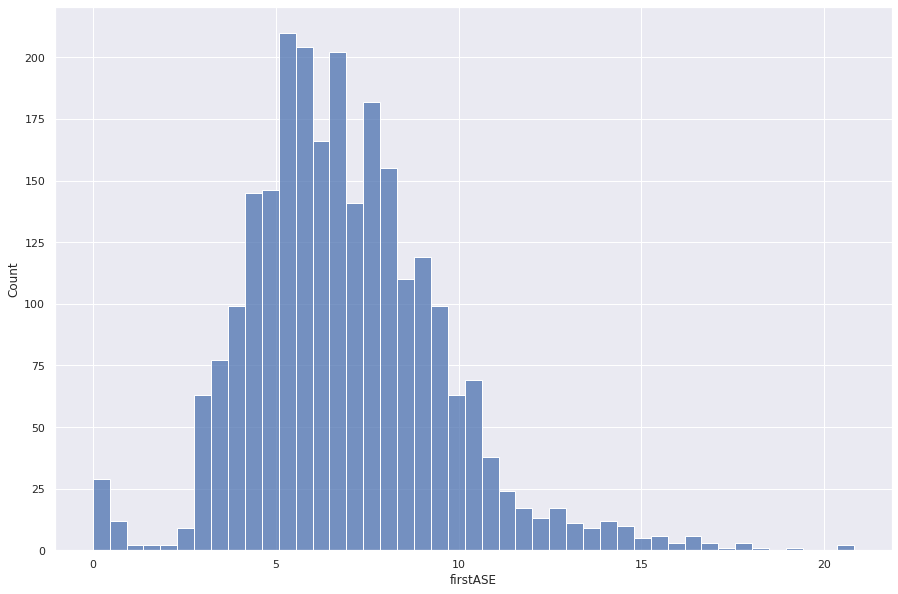

In [ ]:
sns.histplot(data= data, x = "firstASE")

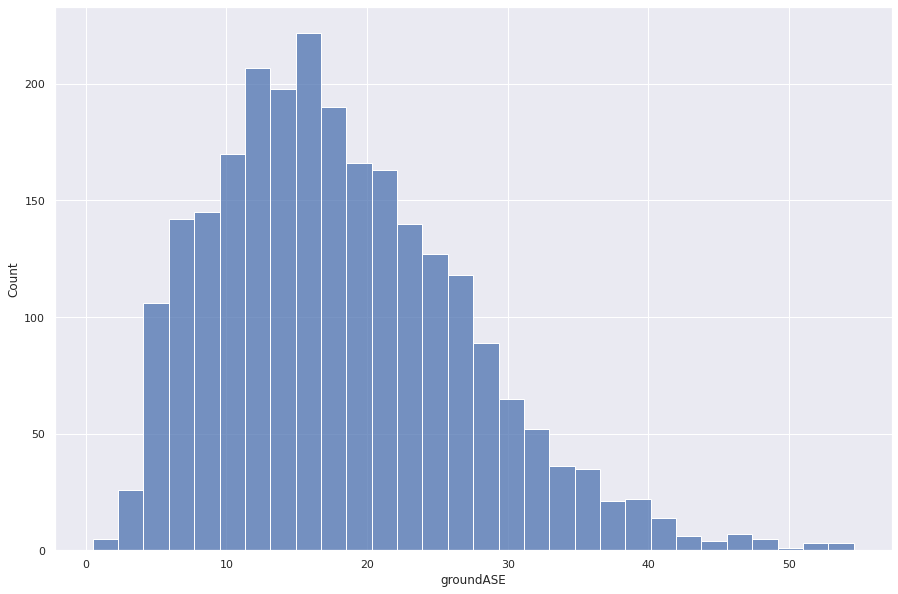

In [ ]:
sns.histplot(data= data, x = "groundASE")

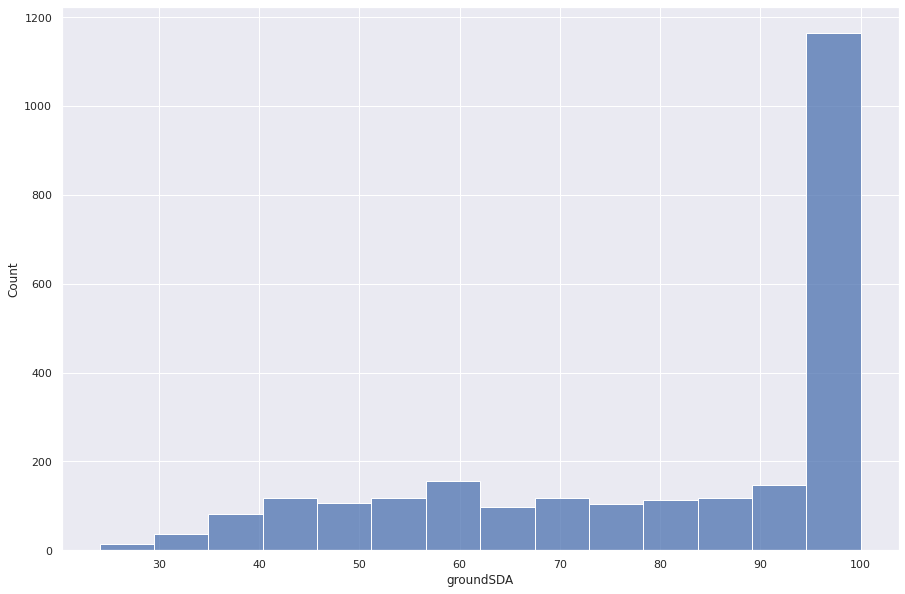

In [ ]:
sns.histplot(data= data, x = "groundSDA")

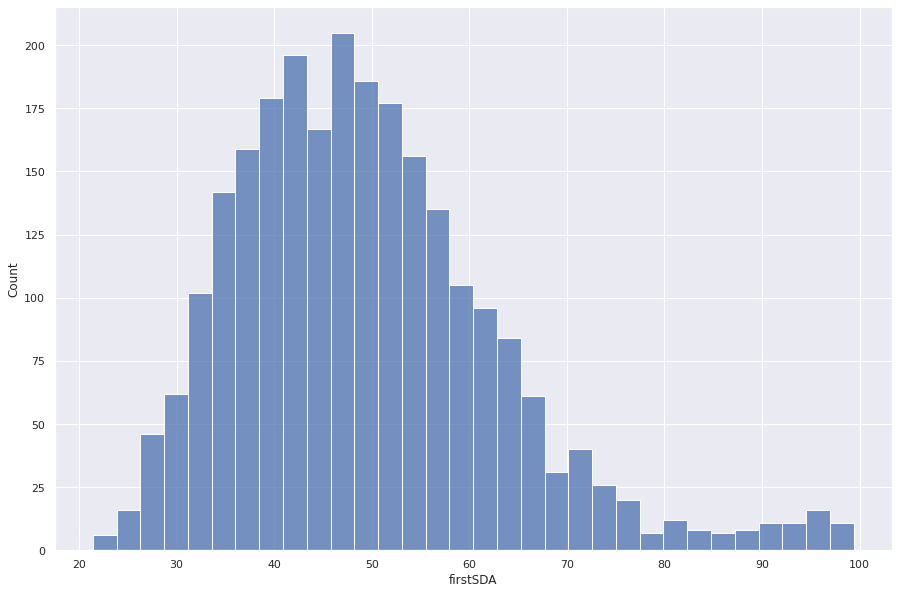

In [ ]:
sns.histplot(data= data, x = "firstSDA")

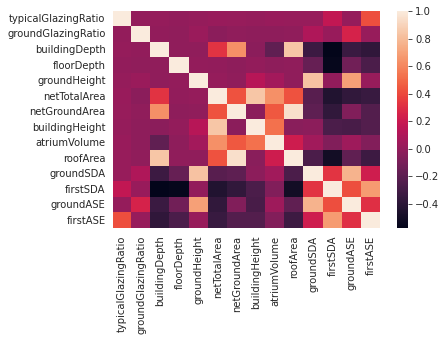

In [ ]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

PLOTTING ALL THE PCS





In [ ]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'black', ha = 'center', va = 'center', alpha = 0.9)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'black', ha = 'center', va = 'center')

No handles with labels found to put in legend.


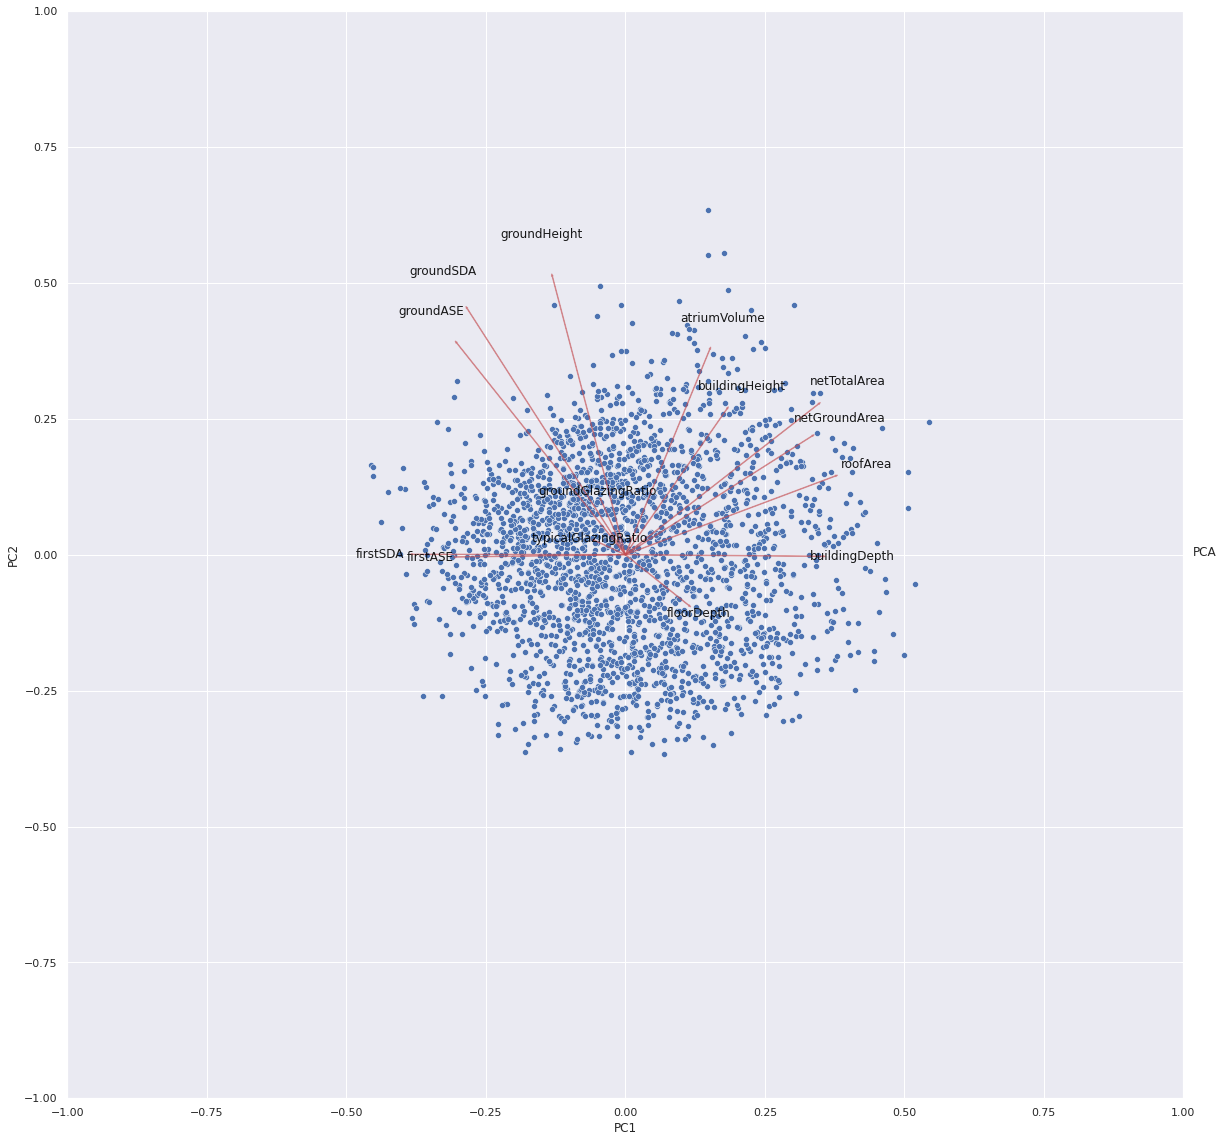

In [ ]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()

fig.set_size_inches(20, 20)
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)

### Preprocessing

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
#data_num = data.drop(columns = 'species')
data_num = data

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data_num.columns).describe()

,typicalGlazingRatio,groundGlazingRatio,buildingDepth,floorDepth,groundHeight,netTotalArea,netGroundArea,buildingHeight,atriumVolume,roofArea,groundSDA,firstSDA,groundASE,firstASE
count,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000,2488.000
mean,0.000,-0.000,-0.000,-0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.380,-1.447,-0.898,-1.709,-1.342,-1.469,-2.020,-1.715,-1.169,-1.860,-2.616,-2.063,-1.995,-2.584
25%,-1.380,-0.025,-0.898,-0.751,-0.445,-0.808,-0.742,-0.912,-0.677,-0.732,-0.874,-0.722,-0.754,-0.642
50%,0.005,-0.025,-0.338,0.206,-0.445,-0.145,-0.112,0.004,-0.283,-0.175,0.505,-0.117,-0.146,-0.119
75%,1.390,1.396,0.503,0.685,1.349,0.629,0.686,0.921,0.334,0.610,0.873,0.531,0.632,0.553
max,1.390,1.396,4.145,1.643,1.349,3.813,2.731,1.724,7.215,3.351,0.873,3.685,4.105,5.183


### Executing PCA

In [ ]:
# Instantiate a PCA object
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fit the model
model.fit(data_scaled)

PCA()

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)
data_num_reduced_df = pd.DataFrame(data_reduced)


print(data_num_reduced_df)

         0      1      2      3      4      5      6      7      8      9   \
0     1.063 -2.041 -1.208 -1.618  1.191  0.495  0.746 -0.954  0.390  0.305   
1     0.406  1.723 -0.097 -1.562  0.069  0.345  2.612  0.114 -0.305  0.061   
2    -2.270 -1.523  1.260  3.228 -0.053  0.348  1.629  1.921 -0.081  0.724   
3     0.194  0.591 -0.449  0.237 -2.087  0.403  1.829 -0.461 -0.457 -0.075   
4    -2.410  1.497 -1.053  0.286  0.849 -0.438 -1.242  0.084  0.331 -0.501   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2483 -1.463  0.715  2.740 -1.360  0.575  0.956 -0.098  0.977  0.060 -0.256   
2484 -0.664  0.212  1.235 -0.038 -1.659  1.074 -0.313 -0.295 -0.840  0.187   
2485  3.051  2.081 -0.403  0.215  1.906 -0.202 -0.910  0.412  0.294  0.184   
2486 -0.396  1.286  1.257  0.062  1.838 -1.729  0.735 -0.078 -0.223  0.019   
2487  1.413  0.031 -1.759 -0.544  0.616 -1.008  1.143  0.856  0.185  0.002   

         10     11     12     13  
0     0.138  0.034 -0.078  0

### Inspecting Results

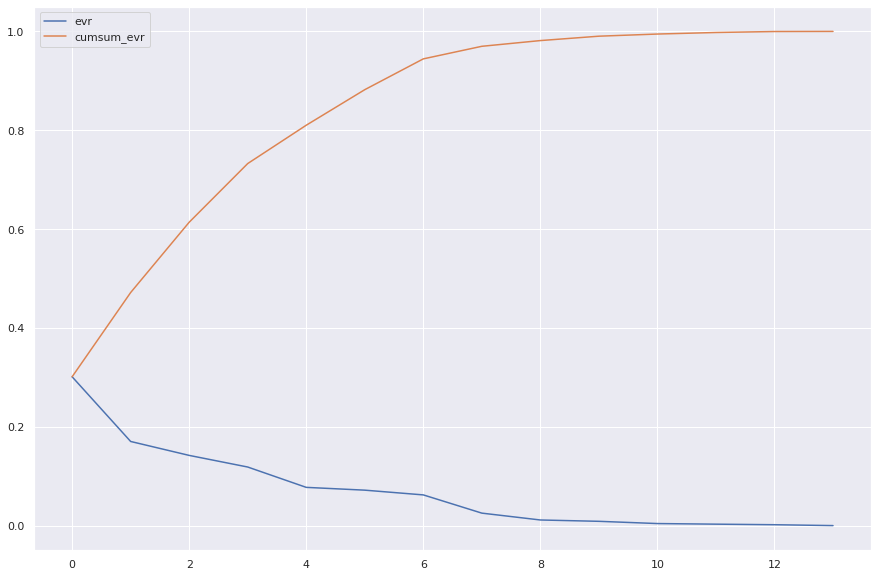

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
print(model.explained_variance_ratio_)

[3.01304794e-01 1.70413959e-01 1.42225710e-01 1.18713834e-01
 7.75610002e-02 7.19079937e-02 6.23126409e-02 2.54388037e-02
 1.15741756e-02 8.87491140e-03 4.34234298e-03 3.12037453e-03
 1.98335907e-03 2.26101412e-04]


In [ ]:

explained_variance = model.explained_variance_ratio_

No handles with labels found to put in legend.


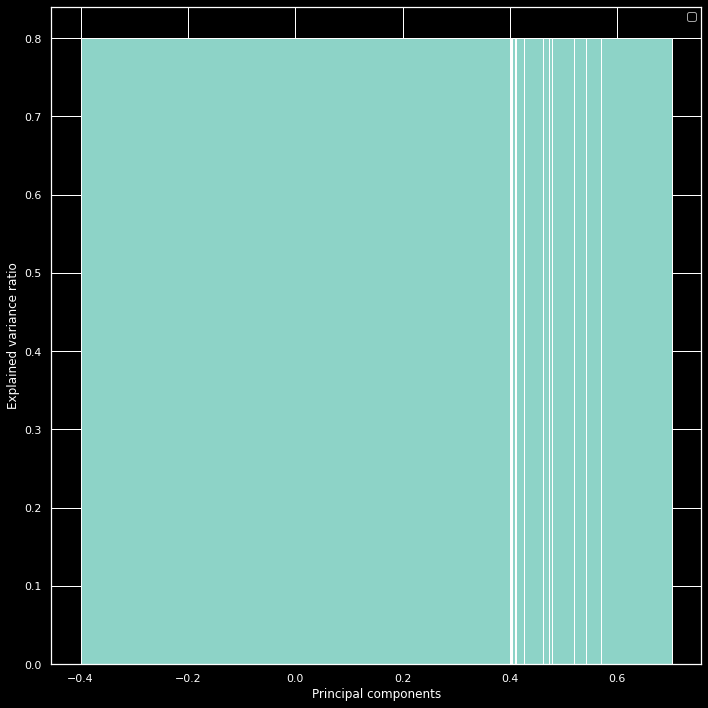

In [ ]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10 ))
    #plt.bar(range(0,5), explained_variance [:4], alpha=0.5,align='center', label='individual explained variance' )
    plt.bar(explained_variance, width=0.8,height=0.8, bottom=None, data=explained_variance)
    plt.xlabel('Principal components')
    plt.ylabel('Explained variance ratio')
    plt.legend()
    plt.tight_layout()

PLOTTING ALL THE PCS

In [ ]:
def myplot_df(df,coeff, scale, labels = None):
    df["xs"] = df[df.columns[0]]
    df["ys"] = df[df.columns[1]]
    #print(df)
    
    n = coeff.shape[0]
    
    
    if scale == True:
        scalex = 1.0/(df["xs"].max() - df["xs"].min())
        scaley = 1.0/(df["ys"].max() - df["ys"].min())

        df["xs"] = scalex *  df["xs"] 
        df["ys"] = scaley * df["ys"] 
    
    g = sns.scatterplot(x='xs',y='ys', data=df)
    g.legend(title = "PCA", loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, frameon = False)

    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, data_num.columns[i], color = 'g', ha = 'center', va = 'center', alpha = 0.5)
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')

In [ ]:
'''plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
fig = plt.gcf()
fig.set_size_inches(10, 10)
fig.set_canvas()
myplot_df(data_num_reduced_df, np.transpose(model.components_[0:2, :]), True)'''


The important features are the ones that influence more the components and thus, have a large absolute value/score on the component.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data_num.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

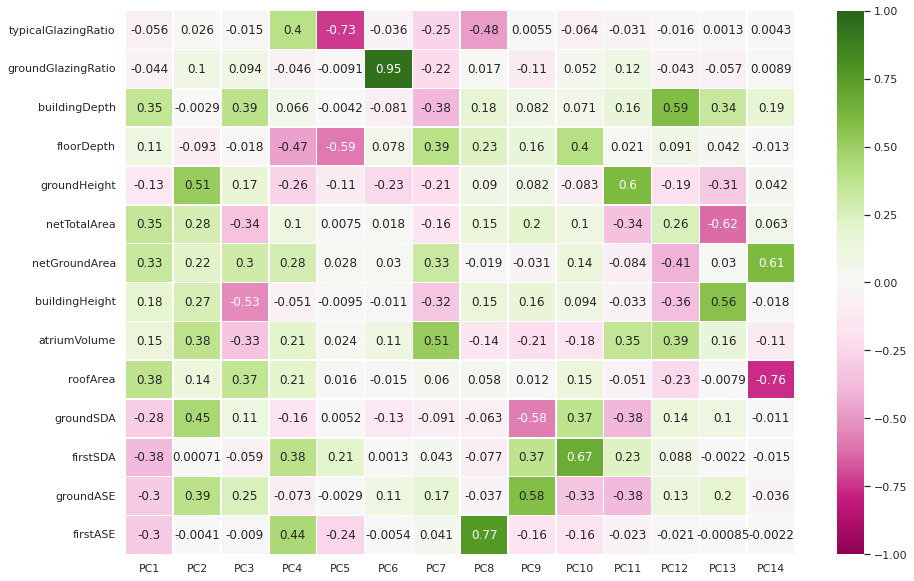

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="PiYG", vmin=-1, vmax=1, annot=True)  

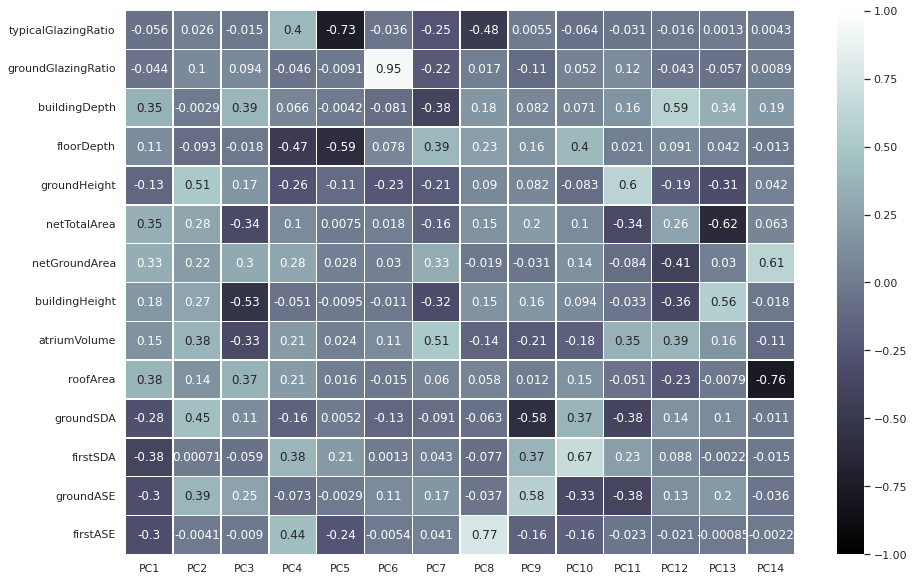

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = data_num.columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

print(df)

       0                    1
0    PC0             firstSDA
1    PC1         groundHeight
2    PC2       buildingHeight
3    PC3           floorDepth
4    PC4  typicalGlazingRatio
5    PC5   groundGlazingRatio
6    PC6         atriumVolume
7    PC7             firstASE
8    PC8            groundASE
9    PC9             firstSDA
10  PC10         groundHeight
11  PC11        buildingDepth
12  PC12         netTotalArea
13  PC13             roofArea


In [ ]:
#https://medium.com/predict/dimensionality-reduction-using-python-principal-component-analysis-fb365f39ae5c

def correlation_heatmap(dataframe,l,w):
    #correlations = dataframe.corr()
    correlation = dataframe.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show();

In [ ]:
#data_num_reduced_df

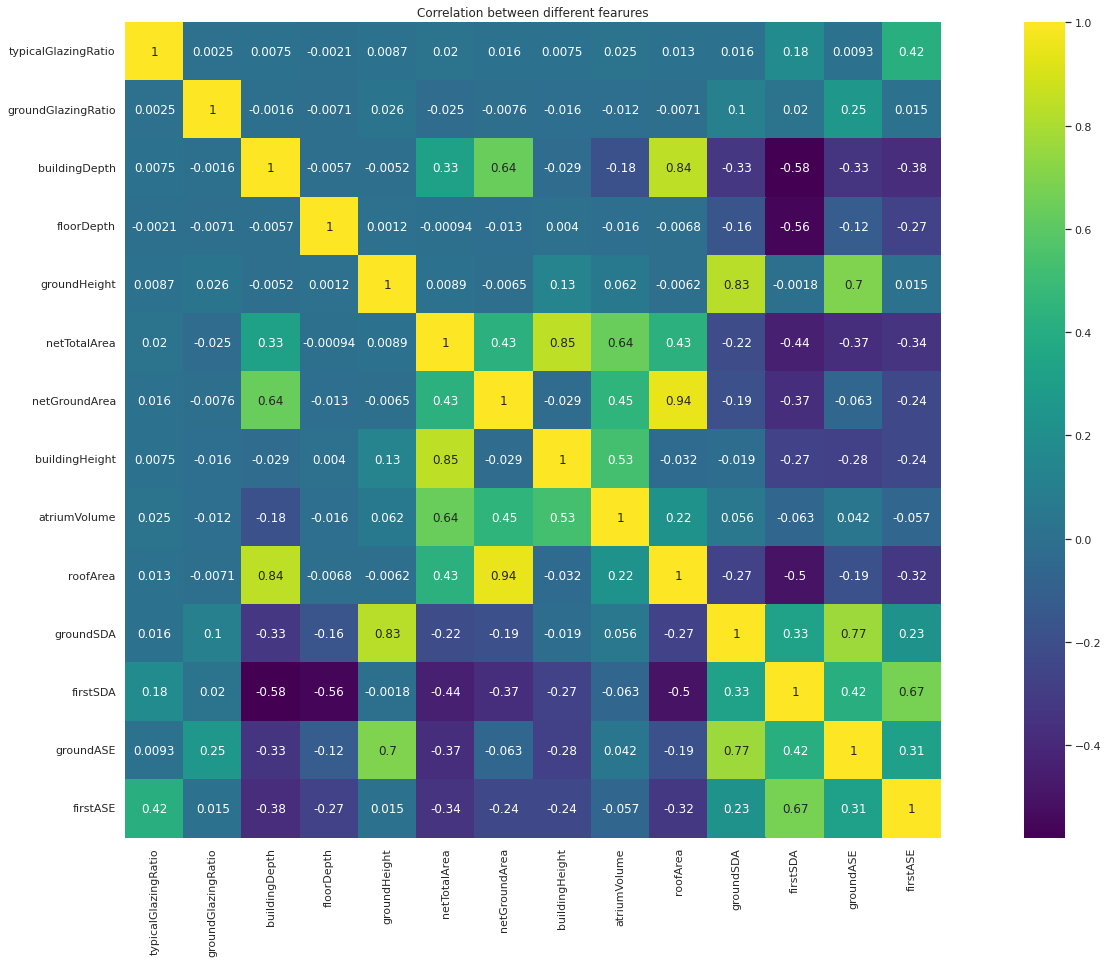

In [ ]:
# Let's Drop Class column and see the correlation Matrix & Pairplot Before using this dataframe for PCA as PCA should only be perfromed on independent attribute
#cleandf= newdf.drop('class', axis=1)
#print("After Dropping: ", cleandf)
correlation_heatmap(data, 30,15)

**No Categorical Data**

In [ ]:
#! pip install prince

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
'''cor_mat1 = np.corrcoef(X_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cor_mat1)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)'''

"cor_mat1 = np.corrcoef(X_scaled.T)\neig_vals, eig_vecs = np.linalg.eig(cor_mat1)\nprint('Eigenvectors \n%s' %eig_vecs)\nprint('\nEigenvalues \n%s' %eig_vals)"

In [ ]:
# no categorical data
'''import prince
famd = prince.FAMD(n_components=6, n_iter=3, copy=True, check_input=True, engine='auto', random_state=42)
famd = famd.fit(data)'''